Reinforcement learning using Q Learning and Open AI Gymnasium

Eric Song

Documentation for Gymnasium can be found at https://gymnasium.farama.org/index.html. The environment we will be using is the Cart Pole env: https://gymnasium.farama.org/environments/classic_control/cart_pole.

README: I imagine that students will go on the OpenAI Gymnasium documentation and work through the examples of agent training and Q-learning provided at https://gymnasium.farama.org/introduction/basic_usage and https://gymnasium.farama.org/introduction/train_agent. Afterwards, they will have learned the basics of working with Gymnasium environments and can go to the Cart Pole documentation provided above and go through the assignment and complete all the necessary functions. The results students get should be an increasing rewards graph as episodes get higher. It is hard to render the env on Colab, but if students are working on a local IDE, then they can optionally render their env to see the training happen in real time.

In [ ]:
%pip install gymnasium

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create the CartPole environment
env = gym.make("CartPole-v1")

In [ ]:
def create_bins():
    """
    Discretize the continuous state space
    Returns bin edges for each dimension of the state space.
    """
    bins = [
        np.linspace(-2.4, 2.4, 10),    # cart position
        np.linspace(-4, 4, 10),        # cart velocity
        np.linspace(-0.2095, 0.2095, 10),# pole angle
        np.linspace(-4, 4, 10)         # pole velocity
    ]
    return bins

In [ ]:
def discretize_state(state, bins):
    """
    Discretizes a continuous state into a tuple of bin indices.
    """
    discrete_state = tuple(
        int(np.digitize(state[i], bins[i])) for i in range(len(state))
    )
    return discrete_state

In [ ]:
def initialize_q_table(bins, n_actions):
    """Initializes a Q-table with zeros."""
    sizes = tuple(len(b)+1 for b in bins) + (n_actions,)
    return np.zeros(sizes)

In [ ]:
def choose_action(state, q_table, epsilon, n_actions):
    #TODO: implement epsilon greedy action selection policy

    # Pseudocode to help you get started:
    # If a random number between 0 and 1 is less than epsilon:
    # Choose a random action
    # Else:
    # Choose the action with the highest Q-value for the current state
    pass

In [ ]:
def update_q_table(q_table, state, action, reward, next_state, alpha, gamma):
    # TODO: update Q table based on action-value function (q-function)

    # Pseudocode to help you get started:
    # Find the best Q-value for the next state (best_next_action)
    # Calculate the target value: reward + discount * next best Q value
    # Update the Q-value for the current (state, action) pair towards the target
    pass

In [ ]:
bins = create_bins()
q_table = initialize_q_table(bins, env.action_space.n)

In [ ]:
# Hyperparameters
alpha = 0.1           # learning rate
gamma = 0.99          # discount factor
epsilon = 1.0         # initial exploration rate
epsilon_decay = 0.999
epsilon_min = 0.001
episodes = 5000

In [ ]:
# Train agent
def train(env, q_table, bins, episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min):
    rewards = []
    for episode in range(episodes):
        state, _ = env.reset()
        state = discretize_state(state, bins)
        total_reward = 0
        done = False

        while not done and total_reward < 1000:
            # TODO: finish train function based on Open AI Gymnasium documentation

            # Choose an action using the current state and epsilon-greedy strategy
            # Take the action in the environment and observe:
            #     - the next state
            #     - the reward
            #     - whether the episode ended (done)
            # Discretize the next state into bins
            # Update the Q-table based on (state, action, reward, next state)
            # Move to the next state
            # Add the reward to the total reward for this episode
            pass

        # Add the total reward for this episode to the rewards list
        # Decrease epsilon (but don't let it go below the minimum value)

        if (episode+1) % 500 == 0:
            print(f"Episode {episode+1}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    return rewards

In [ ]:
rewards = train(env, q_table, bins, episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min)

# Plot results
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.grid()
plt.show()

Episode 500, Reward: 18.0, Epsilon: 0.606
Episode 1000, Reward: 16.0, Epsilon: 0.368
Episode 1500, Reward: 147.0, Epsilon: 0.223
Episode 2000, Reward: 137.0, Epsilon: 0.135
Episode 2500, Reward: 123.0, Epsilon: 0.082
Episode 3000, Reward: 209.0, Epsilon: 0.050
Episode 3500, Reward: 186.0, Epsilon: 0.030
Episode 4000, Reward: 151.0, Epsilon: 0.018
Episode 4500, Reward: 136.0, Epsilon: 0.011
Episode 5000, Reward: 218.0, Epsilon: 0.007


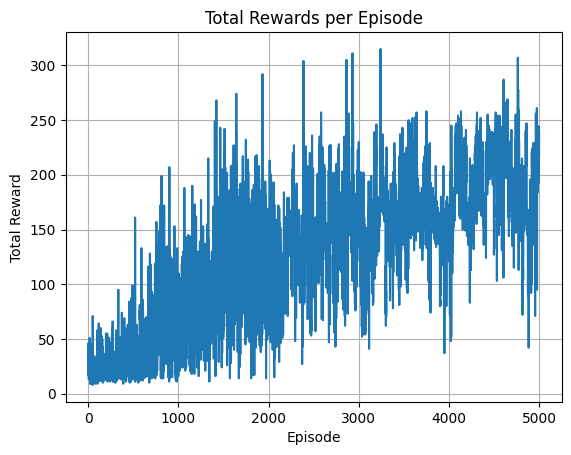

In [ ]:
# Solution

# Reinforcement Learning using Q-Learning and OpenAI Gymnasium
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Create environment
env = gym.make("CartPole-v1")

# Discretize the continuous state space
def create_bins():
    bins = [
        np.linspace(-2.4, 2.4, 10),    # cart position
        np.linspace(-4, 4, 10),        # cart velocity
        np.linspace(-0.2095, 0.2095, 10),# pole angle
        np.linspace(-4, 4, 10)         # pole velocity
    ]
    return bins

def discretize_state(state, bins):
    return tuple(np.digitize(s, b) for s, b in zip(state, bins))

# Initialize Q-table
def initialize_q_table(bins, n_actions):
    sizes = tuple(len(b)+1 for b in bins) + (n_actions,)
    return np.zeros(sizes)

bins = create_bins()
q_table = initialize_q_table(bins, env.action_space.n)

# Hyperparameters
alpha = 0.1           # learning rate
gamma = 0.99          # discount factor
epsilon = 1.0         # initial exploration rate
epsilon_decay = 0.999
epsilon_min = 0.001
episodes = 5000

# Choose action based on epsilon greedy
def choose_action(state, q_table, epsilon, n_actions):
    if np.random.random() < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(q_table[state])

# Update Q-table using Q function
def update_q_table(q_table, state, action, reward, next_state, alpha, gamma):
    best_next_action = np.max(q_table[next_state])
    target = reward + gamma * best_next_action
    q_table[state + (action,)] += alpha * (target - q_table[state + (action,)])
    return q_table

# Train agent
def train(env, q_table, bins, episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min):
    rewards = []
    for episode in range(episodes):
        state, _ = env.reset()
        state = discretize_state(state, bins)
        total_reward = 0
        done = False

        while not done and total_reward < 1000:
            action = choose_action(state, q_table, epsilon, env.action_space.n)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state = discretize_state(next_state, bins)

            q_table = update_q_table(q_table, state, action, reward, next_state, alpha, gamma)
            state = next_state
            total_reward += reward

        rewards.append(total_reward)
        epsilon = max(epsilon * epsilon_decay, epsilon_min)

        if (episode+1) % 500 == 0:
            print(f"Episode {episode+1}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    return rewards

rewards = train(env, q_table, bins, episodes, alpha, gamma, epsilon, epsilon_decay, epsilon_min)

# Plot results
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.grid()
plt.show()